In [1]:
import UNI_v3_funcs as liq_amounts
import numpy as np
import pandas as pd

In [2]:
#Pool features
decimals0=6
decimals1=18
tick_space=60 #fee_tier
# feeAmountTickSpacing[500] = 10;
#         emit FeeAmountEnabled(500, 10);
#         feeAmountTickSpacing[3000] = 60;
#         emit FeeAmountEnabled(3000, 60);
#         feeAmountTickSpacing[10000] = 200;
#         emit FeeAmountEnabled(10000, 200);
test=pd.DataFrame()

#Ticks of the range to simulate
tick_lower=196740
tick_upper=201120

#Tick of the pool at time0
tick_entry=198740
sqrt_entry=(1.0001**(tick_entry/2)*(2**96))

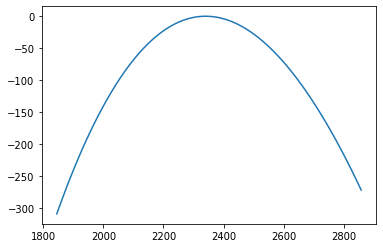

In [4]:

#Create vector with every tick_space in the range (that we want to simulate)
test['ticks'] = list(range(tick_lower, tick_upper+1, tick_space))

test['sqrt']=(1.0001**(test['ticks']/2)*(2**96))
test['sqrtA']=(1.0001**(tick_lower/2)*(2**96))
test['sqrtB']=(1.0001**(tick_upper/2)*(2**96))

#Calls liquidity amount formula to calculate the relation of tokens required to pool at time0
relation_token= abs(liq_amounts.amounts_relation (tick_entry,tick_lower,tick_upper,decimals0,decimals1))

#Calculating amounts of token0 based on 1 unit of t1
amount1=1
amount0=1/relation_token

#Calls amountsforliquidity formula to get liquidity deployed 
initial_liquidity= liq_amounts.get_liquidity(tick_entry,tick_lower,tick_upper,amount0,amount1,decimals0,decimals1)   
test['liquidity']=initial_liquidity
#Calculate amounts at every tick space based on liquidity
test['amounts_0']=test.apply(lambda x: liq_amounts.get_amounts(x['ticks'],tick_lower,tick_upper,x['liquidity'],decimals0,decimals1)[0] ,axis=1)
test['amounts_1']=test.apply(lambda x: liq_amounts.get_amounts(x['ticks'],tick_lower,tick_upper,x['liquidity'],decimals0,decimals1)[1] ,axis=1)

#Calculating price at every tick_space
test['price_t1/t0']=1/(1.0001**test['ticks']/10**(decimals1-decimals0))

#Calculating the value of the position in every tick_space
test['value_LP']=test['amounts_1']*test['price_t1/t0']+test['amounts_0']

#Calculating the value of holding the initial amount of tokens
test['value_Hold']=amount1*test['price_t1/t0']+amount0

#Calculating IL
test['IL_USD']=test['value_LP']-test['value_Hold']
test['ILvsHold']=test['IL_USD']/test['value_Hold']

#Plotting price vs IL
import matplotlib.pyplot as plt
plt.plot(test['price_t1/t0'],test['IL_USD'])
# plt.plot(test['price_t1/t0'],test['ILvsHold'])
plt.show()

In [5]:
test

,ticks,sqrt,sqrtA,sqrtB,liquidity,amounts_0,amounts_1,price_t1/t0,value_LP,value_Hold,IL_USD,ILvsHold
0,196740,1481906519668518752438342819774464.0,1.481907e+33,1.844703e+33,5.083770e+14,5345.418167,0.000000,2858.364109,5345.418167,5617.414545,-271.996378,-0.048420
1,196800,1486358691541488066425946722271232.0,1.481907e+33,1.844703e+33,5.083770e+14,5264.005310,0.028568,2841.266125,5345.174307,5600.316561,-255.142254,-0.045559
2,196860,1490824239315112056413335756734464.0,1.481907e+33,1.844703e+33,5.083770e+14,5182.836313,0.057222,2824.270416,5344.445645,5583.320852,-238.875207,-0.042784
3,196920,1495303203175332150757607193182208.0,1.481907e+33,1.844703e+33,5.083770e+14,5101.910446,0.085961,2807.376371,5343.236539,5566.426807,-223.190268,-0.040096
4,196980,1499795623428822564856782710112256.0,1.481907e+33,1.844703e+33,5.083770e+14,5021.226981,0.114788,2790.583382,5341.551314,5549.633817,-208.082504,-0.037495
...,...,...,...,...,...,...,...,...,...,...,...,...
69,200880,1822700328412064284897136682729472.0,1.481907e+33,1.844703e+33,5.083770e+14,263.576533,2.186744,1889.420503,4395.256399,4648.470939,-253.214540,-0.054473
70,200940,1828176365548889488738622703140864.0,1.481907e+33,1.844703e+33,5.083770e+14,197.385595,2.221882,1878.118485,4370.343509,4637.168921,-266.825413,-0.057541
71,201000,1833668854640134361463765195554816.0,1.481907e+33,1.844703e+33,5.083770e+14,131.392922,2.257125,1866.884073,4345.184297,4625.934509,-280.750212,-0.060690
72,201060,1839177845113295093333591821647872.0,1.481907e+33,1.844703e+33,5.083770e+14,65.597922,2.292474,1855.716862,4319.781423,4614.767298,-294.985875,-0.063922
